In [24]:
from elasticsearch import Elasticsearch
import yaml
from yaml.loader import SafeLoader
import time
import json
import pandas as pd
from datetime import datetime, timedelta
import pytz
from datetime import timedelta
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False



In [25]:
from binance.client import Client
import os 
from dotenv import load_dotenv


load_dotenv()

API_KEY =  os.getenv("API_KEY") 
API_SECRET =  os.getenv("API_SECRET") 

client = Client(API_KEY, API_SECRET )


def get_binance_data ( coin,interval ,start , end):
    
    from binance.client import Client
    client = Client(API_KEY, API_SECRET)
    print( )

    data  = client.get_historical_klines( coin,interval ,start , end)

   
    return data
data = get_binance_data('BTCUSDT', Client.KLINE_INTERVAL_30MINUTE, '1 Jun 2020', '21 Mar 2023')




In [27]:
import pandas as pd
df = pd.DataFrame(data , columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'quote_asset_volume','num_trades','taker_base_vol','taker_quote_vol', 'ignore'] )
df['open_time'] = pd.to_datetime(df['open_time'])
df.set_index('open_time', inplace=True)
df = df.astype(float)
df.head()

,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_vol,taker_quote_vol,ignore
open_time,,,,,,,,,,,
1970-01-01 00:26:30.969600,9448.27,9497.91,9421.67,9488.03,1123.773333,1.590971e+12,1.064119e+07,15624.0,630.257917,5.968085e+06,0.0
1970-01-01 00:26:30.971400,9488.02,9508.57,9461.55,9498.31,618.352584,1.590973e+12,5.865224e+06,11024.0,319.790016,3.033180e+06,0.0
1970-01-01 00:26:30.973200,9498.78,9505.90,9465.30,9495.82,627.945814,1.590975e+12,5.955863e+06,10886.0,275.890949,2.616954e+06,0.0
1970-01-01 00:26:30.975000,9496.31,9570.00,9485.97,9551.58,1436.432396,1.590977e+12,1.368192e+07,16010.0,825.881269,7.867149e+06,0.0
1970-01-01 00:26:30.976800,9551.17,9568.61,9526.87,9541.61,1303.772734,1.590979e+12,1.244826e+07,13543.0,503.463507,4.806452e+06,0.0


In [28]:
df.shape


(49055, 11)

In [5]:
# Class used for generating windows in the time serie  where inputs are used to produce the future outputs

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window
def plot(self,plot_col,  model=None,   max_subplots=3, ):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      try:
        predictions = model(inputs)
        print(predictions , len(predictions ))
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
         marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64) 
      except:
        #inputs = inputs[n:n+1]
        predictions = model.predict(inputs)
        plt.scatter(self.label_indices, predictions[0, :, 0],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)
      

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds
def plot_data(df) :

    plot_cols = df.columns[1]
    plot_features = df[plot_cols]
    plot_features.index = df.index
    #_ = plot_features.plot(subplots=True)

    plot_features = df[plot_cols][:480]
    plot_features.index = df.index[:480]
    _ = plot_features.plot(subplots=True)

WindowGenerator.make_dataset = make_dataset
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_vol,taker_quote_vol,ignore
0,-0.992147,-0.990852,-0.990733,-0.990972,0.141191,-0.999651,-0.538042,-0.389667,0.321357,-0.497508,0.0
1,-0.990811,-0.990495,-0.989387,-0.990626,-0.397950,-0.999593,-0.649105,-0.599977,-0.345631,-0.635145,0.0
2,-0.990449,-0.990585,-0.989261,-0.990710,-0.387717,-0.999535,-0.646998,-0.606286,-0.439940,-0.654664,0.0
3,-0.990532,-0.988440,-0.988563,-0.988835,0.474710,-0.999477,-0.467331,-0.372020,0.741620,-0.408449,0.0
4,-0.988688,-0.988486,-0.987182,-0.989170,0.333200,-0.999419,-0.496019,-0.484810,0.048961,-0.551985,0.0
...,...,...,...,...,...,...,...,...,...,...,...
34333,-0.308558,-0.307544,-0.304543,-0.304305,-0.234508,0.998025,-0.250292,0.114665,-0.124459,-0.186049,0.0
34334,-0.304256,-0.306382,-0.304686,-0.307511,-0.163676,0.998083,-0.203926,0.192433,-0.109074,-0.175746,0.0
34335,-0.307461,-0.308823,-0.304780,-0.305485,-0.222845,0.998141,-0.243173,0.089244,-0.135574,-0.193810,0.0
34336,-0.305435,-0.307036,-0.304192,-0.305726,0.019288,0.998199,-0.084940,0.214013,-0.100968,-0.170394,0.0


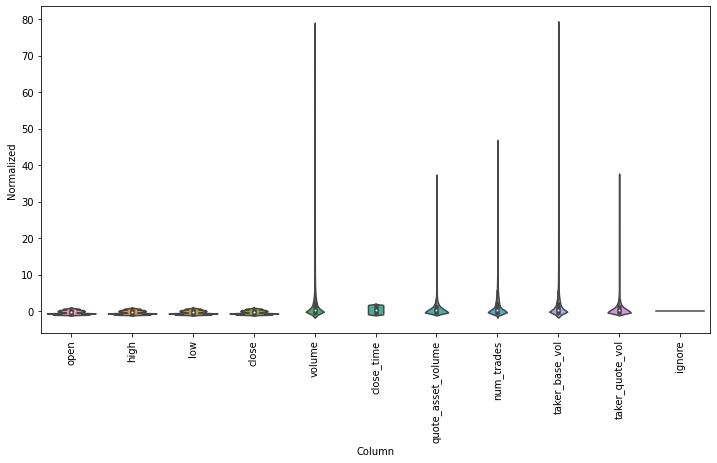

In [40]:

from sklearn.preprocessing import RobustScaler
import numpy as np

def train_test(df):
    
    column_indices = {name: i for i, name in enumerate(df.columns)}

    n = len(df)
    train_df = df[0:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]

    # Calculate mean and standard deviation only on the training set
    scaler = RobustScaler()
    train_df_norm = scaler.fit_transform(train_df)
    val_df_norm = scaler.transform(val_df)
    test_df_norm = scaler.transform(test_df)

    # Check for any missing values
    if np.isnan(train_df_norm).any():
        train_df_norm = train_df_norm[~np.isnan(train_df_norm).any(axis=1)]
    if np.isnan(val_df_norm).any():
        val_df_norm = val_df_norm[~np.isnan(val_df_norm).any(axis=1)]
    if np.isnan(test_df_norm).any():
        test_df_norm = test_df_norm[~np.isnan(test_df_norm).any(axis=1)]

    # Convert the normalized arrays back to pandas DataFrames
    train_df_norm = pd.DataFrame(train_df_norm, columns=df.columns)
    val_df_norm = pd.DataFrame(val_df_norm, columns=df.columns)
    test_df_norm = pd.DataFrame(test_df_norm, columns=df.columns)

    # This plots data distribution   
    df_std = scaler.transform(df)
    df_std = pd.DataFrame(df_std, columns=df.columns)
    df_std = df_std.melt(var_name='Column', value_name='Normalized')
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
    _ = ax.set_xticklabels(df.keys(), rotation=90)

    return train_df_norm, val_df_norm, test_df_norm



test = train_test(df)[0]

def compile_and_fit(model, window, patience=2):
  MAX_EPOCHS = 20

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history
test

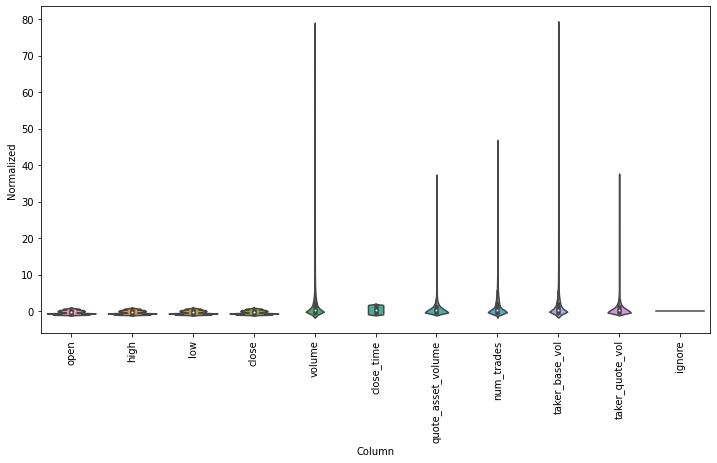

In [37]:
train_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'num_trades', 'taker_base_vol', 'taker_quote_vol',
       'ignore'],
      dtype='object')

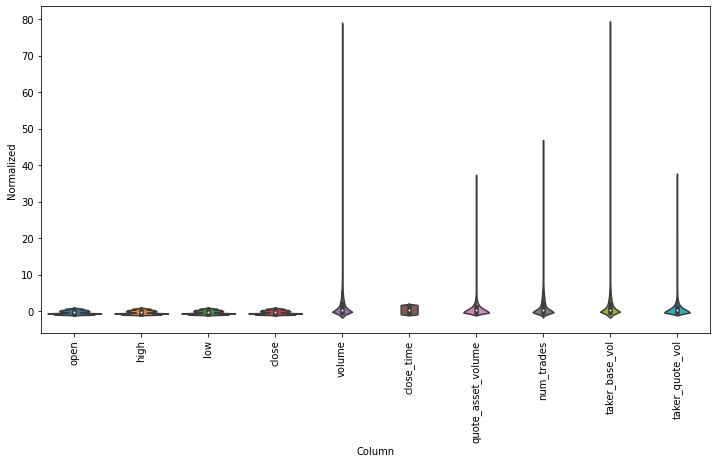

In [42]:
variables_used = ['open', 'high', 'low', 'close', 'volume','close_time', 'quote_asset_volume','num_trades','taker_base_vol','taker_quote_vol' ]
train_df, val_df, test_df = train_test(df[variables_used])

imput_width=48*7
label_width = 48

wide_window = WindowGenerator(
        input_width=imput_width, label_width=label_width, shift=0,
        label_columns=["close"] , train_df=train_df, val_df=val_df, test_df=test_df )

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(imput_width, len(variables_used))),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(label_width)
])

LSTM =  tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(imput_width,  len(variables_used))),
    tf.keras.layers.Dense(label_width)
])

Conv1D = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(imput_width,  len(variables_used))),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(label_width)
])


models = [ dense , LSTM , Conv1D]


In [43]:

val_performance={}
performance={}
for model in models:
        history = compile_and_fit(model, wide_window)

        val_performance[f"{model.name}"] = model.evaluate(wide_window.val)
        performance[f"{model.name}"] = model.evaluate(wide_window.test, verbose=0)


Epoch 1/20
1063/1063 [==============================] - 12s 11ms/step - loss: 0.0829 - mean_absolute_error: 0.1140 - val_loss: 0.0351 - val_mean_absolute_error: 0.1261
Epoch 2/20
1063/1063 [==============================] - 12s 11ms/step - loss: 0.0024 - mean_absolute_error: 0.0337 - val_loss: 0.0216 - val_mean_absolute_error: 0.1043
Epoch 3/20
1063/1063 [==============================] - 11s 11ms/step - loss: 0.0017 - mean_absolute_error: 0.0283 - val_loss: 0.0209 - val_mean_absolute_error: 0.1052
Epoch 4/20
1063/1063 [==============================] - 11s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0255 - val_loss: 0.0326 - val_mean_absolute_error: 0.1400
Epoch 5/20
1063/1063 [==============================] - 11s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0259 - val_loss: 0.0088 - val_mean_absolute_error: 0.0694
Epoch 6/20
1063/1063 [==============================] - 11s 11ms/step - loss: 6.5546e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0087 - val_mean_absolute_er

In [44]:
dense.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 336, 64)           704       
                                                                 
 flatten_8 (Flatten)         (None, 21504)             0         
                                                                 
 dense_21 (Dense)            (None, 48)                1032240   
                                                                 
Total params: 1,032,944
Trainable params: 1,032,944
Non-trainable params: 0
_________________________________________________________________


In [45]:
import numpy as np
import tensorflow as tf

# Load your trained model
model = dense

# Create a sample input for prediction
sample_input = np.zeros((1, 168*2, 10))  # Shape: (batch_size=1, input_width=168, num_variables=10)

# Make a prediction
prediction = model.predict(sample_input)

# Print the predicted output
print(prediction)

1/1 [==============================] - 0s 61ms/step
[[-1.5281141e-03 -3.1564012e-03 -2.1001175e-03 -2.7467310e-03
  -3.6506355e-04 -3.7812293e-03 -1.4998689e-03 -1.2505800e-03
  -9.3396753e-04  8.4776431e-05  2.9069930e-04 -1.6473792e-03
  -9.6100569e-04 -6.5096095e-04 -9.6615776e-04 -1.2467019e-03
  -7.8075007e-04 -1.6558021e-03 -1.7530471e-03 -3.5424531e-03
  -4.7636554e-03 -4.1352697e-03 -3.7913471e-03 -4.1957535e-03
  -3.2099001e-03 -3.9486177e-03 -3.9208941e-03 -4.1067526e-03
  -2.3933724e-03 -2.4531558e-03 -2.8514788e-03 -1.3828576e-03
  -1.4957190e-03 -2.3899786e-03 -5.4178387e-04 -2.6101172e-03
  -1.1498332e-03 -7.4975193e-04 -9.4764307e-04  1.1943579e-03
  -2.4897605e-04 -2.7646944e-03 -1.8581711e-03 -1.6791187e-03
  -2.8901175e-04 -1.6156808e-03 -1.2571290e-03 -1.2101345e-03]]


In [130]:
data_pred = get_binance_data('BTCUSDT', Client.KLINE_INTERVAL_30MINUTE, '1 Mar 2023', '21 Mar 2023')
df_pred = pd.DataFrame(data_pred , columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'quote_asset_volume','num_trades','taker_base_vol','taker_quote_vol', 'ignore'] )
df_pred['open_time'] = pd.to_datetime(df_pred['open_time'])
df_pred.set_index('open_time', inplace=True)
df_pred = df_pred.astype(float)
df_pred.head()


,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_vol,taker_quote_vol,ignore
open_time,,,,,,,,,,,
1970-01-01 00:27:57.628800,23141.57,23219.99,23116.07,23170.13,5003.71260,1.677631e+12,1.159185e+08,191994.0,2545.74183,5.897671e+07,0.0
1970-01-01 00:27:57.630600,23170.13,23217.13,23020.03,23101.00,7733.23658,1.677632e+12,1.786903e+08,238199.0,3773.45813,8.718493e+07,0.0
1970-01-01 00:27:57.632400,23101.00,23169.10,23075.14,23152.02,4917.13801,1.677634e+12,1.137330e+08,174792.0,2503.01758,5.789449e+07,0.0
1970-01-01 00:27:57.634200,23152.02,23296.94,23150.12,23245.96,6657.03919,1.677636e+12,1.546759e+08,231292.0,3367.14927,7.823732e+07,0.0
1970-01-01 00:27:57.636000,23245.96,23288.78,23235.64,23244.87,3326.57511,1.677638e+12,7.737132e+07,152248.0,1645.72117,3.827694e+07,0.0


In [131]:


    # Calculate mean and standard deviation only on the training set
    scaler = RobustScaler()
    scaler_close = RobustScaler()
    
    scaler_close.fit(df_pred[["close"]])
    df_pred_norm = scaler.fit_transform(df_pred)
    # Convert the normalized arrays back to pandas DataFrames

    df_pred_norm = pd.DataFrame(df_pred_norm, columns=df_pred.columns)




In [132]:
df_pred_norm


,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_vol,taker_quote_vol,ignore
0,0.256101,0.267309,0.266273,0.266776,-0.250462,-1.000000,-0.253148,0.102564,-0.228405,-0.234998,0.0
1,0.266814,0.266249,0.229350,0.240853,0.177386,-0.997917,0.147493,0.506398,0.148601,0.118415,0.0
2,0.240882,0.248442,0.250537,0.259985,-0.264033,-0.995833,-0.267096,-0.047782,-0.241525,-0.248557,0.0
3,0.260021,0.295838,0.279364,0.295212,0.008694,-0.993750,-0.005779,0.446030,0.023832,0.006313,0.0
4,0.295260,0.292813,0.312242,0.294804,-0.513351,-0.991667,-0.499174,-0.244817,-0.504782,-0.494341,0.0
...,...,...,...,...,...,...,...,...,...,...,...
956,2.077172,2.043522,2.090001,2.045382,-0.161416,0.991667,0.000287,0.043997,-0.160132,-0.005216,0.0
957,2.047034,2.061029,2.108704,2.060037,-0.385334,0.993750,-0.253296,-0.191223,-0.363760,-0.236182,0.0
958,2.060208,2.045127,2.037742,2.007072,0.039950,0.995833,0.225533,0.382342,0.022456,0.199306,0.0
959,2.007724,1.991358,1.981304,1.971841,0.164380,0.997917,0.359596,0.414689,0.153446,0.341206,0.0


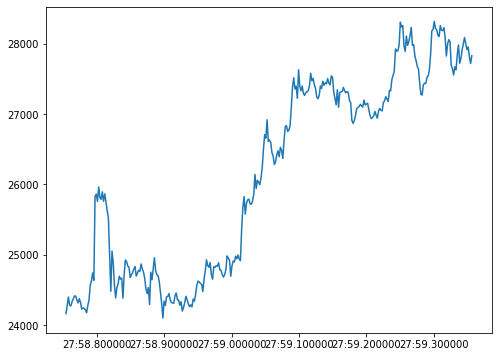

In [133]:
import matplotlib.pyplot as plt

plt.plot(df_pred["close"].tail(48*7))
# display the plot
plt.show()

In [137]:
 
def data_for_prediction_parser( df):
  data = np.array(df [variables_used].tail(48*7), dtype=np.float32)
  print(  data)
  return data .reshape((1, 336, 10))


In [138]:
data_for_prediction = data_for_prediction_parser(df_pred_norm)

[[0.6239595  0.6491093  0.63874376 ... 0.65526676 0.6335587  0.6463057 ]
 [0.6401576  0.6647511  0.6491663  ... 0.47235528 0.53691894 0.5531719 ]
 [0.6857282  0.72017425 0.67242193 ... 0.90002275 0.9900391  1.0088363 ]
 ...
 [2.060208   2.0451274  2.037742   ... 0.38234162 0.02245559 0.19930638]
 [2.0077238  1.9913579  1.981304   ... 0.4146885  0.1534464  0.34120607]
 [1.9724805  1.9963555  2.0149398  ... 0.63363516 0.21208648 0.4110838 ]]


1/1 [==============================] - 0s 22ms/step


,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_vol,taker_quote_vol,ignore
625,24122.19,24249.80,24084.90,24166.31,10374.93859,1.678756e+12,2.506445e+08,255232.0,5352.72011,1.293193e+08,0.0
626,24165.37,24291.99,24112.01,24286.85,9506.66489,1.678757e+12,2.299735e+08,234304.0,5038.01348,1.218856e+08,0.0
627,24286.85,24441.48,24172.50,24402.53,12787.65790,1.678759e+12,3.106744e+08,283236.0,6513.59617,1.582551e+08,0.0
628,24403.42,24496.41,24257.62,24286.38,11561.09371,1.678761e+12,2.817540e+08,272773.0,5662.36397,1.380170e+08,0.0
629,24287.25,24313.67,24251.01,24274.69,4979.87299,1.678763e+12,1.209121e+08,166852.0,2507.05424,6.087327e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...
956,27996.09,28010.88,27859.75,27913.12,5571.79993,1.679351e+12,1.556263e+08,185293.0,2768.07202,7.731708e+07,0.0
957,27915.75,28058.10,27908.40,27952.20,4143.28287,1.679353e+12,1.158952e+08,158380.0,2104.95955,5.888225e+07,0.0
958,27950.87,28015.21,27723.82,27810.96,6856.44405,1.679355e+12,1.909175e+08,224005.0,3362.66740,9.364137e+07,0.0
959,27810.96,27870.18,27577.02,27717.01,7650.26089,1.679357e+12,2.119223e+08,227706.0,3789.23806,1.049673e+08,0.0


1/1 [==============================] - 0s 20ms/step


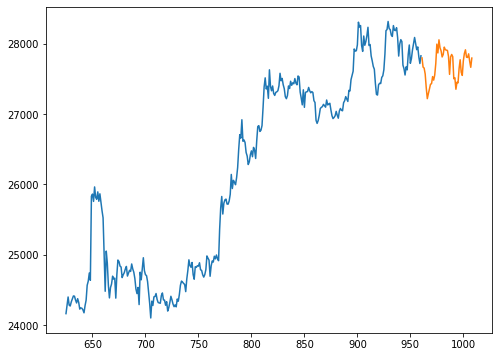

In [169]:

prediction = models[0].predict(data_for_prediction)[0]
normalized_prediction = pd.DataFrame(prediction, columns=["predictions"] ) 
predictions = pd.DataFrame( scaler_close.inverse_transform(normalized_prediction))

df_pred.reset_index(inplace=True , drop=True) 
df_pred.tail(48*7)
predictions.set_index( np.arange( df_pred.shape[0] , np.array( df_pred.shape[0]+ 48 )) ,inplace=True)
plt.plot(df_pred["close"].tail(48*7))
# display the plot
plt.plot( predictions )



plt.show()